In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import boxcox
from scipy.special import boxcox1p
from sklearn import linear_model
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as stats

pd.set_option('max_columns',1000,'max_rows',1000)

In [18]:
train_data = pd.read_csv('pre_processed_train_data.csv')
test_data = pd.read_csv('pre_processed_test_data.csv')
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4,65.0,8450,1,1,3,3,2,4,0,5,2,2,0,5,7,5,2003,2003,1,1,13,14,1,196.0,3,2,2,2,3,1,6,706.0,1,0.0,150.0,856.0,1,5,1,5,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,7,0,0,1,2003,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,0,1,0,2,2008,9,4,208500
1,20,4,80.0,9600,1,1,3,3,2,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,2,2,1,2,3,4,5,978.0,1,0.0,284.0,1262.0,1,5,1,5,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,7,1,3,1,1976,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,0,1,0,5,2007,9,4,181500
2,60,4,68.0,11250,1,1,0,3,2,4,0,5,2,2,0,5,7,5,2001,2002,1,1,13,14,1,162.0,3,2,2,2,3,2,6,486.0,1,0.0,434.0,920.0,1,5,1,5,920,866,0,1786,1.0,0.0,2,1,3,1,3,6,7,1,3,1,2001,2,2.0,608.0,3,3,2,0,42,0,0,0,0,0,0,1,0,9,2008,9,4,223500
3,70,4,60.0,9550,1,1,0,3,2,0,0,6,2,2,0,5,7,5,1915,1970,1,1,14,16,2,0.0,2,2,0,3,4,1,5,216.0,1,0.0,540.0,756.0,1,3,1,5,961,756,0,1717,1.0,0.0,1,0,3,1,3,7,7,1,4,5,1998,1,3.0,642.0,3,3,2,0,35,272,0,0,0,0,0,1,0,2,2006,9,0,140000
4,60,4,84.0,14260,1,1,0,3,2,2,0,15,2,2,0,5,8,5,2000,2000,1,1,13,14,1,350.0,3,2,2,2,3,3,6,655.0,1,0.0,490.0,1145.0,1,5,1,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,3,9,7,1,3,1,2000,2,3.0,836.0,3,3,2,192,84,0,0,0,0,0,0,1,0,12,2008,9,4,250000


In [19]:
numerical_set = {'1stFlrSF' : 0, '2ndFlrSF' : -1, '3SsnPorch' : 1, 'EnclosedPorch' : 1, 'GrLivArea' : 0, 'LotArea' : 0, 'LowQualFinSF' : 1, 'MiscVal' : 1, 'OpenPorchSF' : 0, 'PoolArea' : 1, 'ScreenPorch' : 1, 'BsmtFinSF1' : 0, 'BsmtFinSF2' : 1, 'BsmtUnfSF' : 0.5, 'GarageArea' : 1, 'LotFrontage' : 1, 'MasVnrArea' : -1, 'TotalBsmtSF' : 0.5, 'WoodDeckSF' : -1}
counting_set = {'BedroomAbvGr' : 1, 'Fireplaces' : 0, 'FullBath' : 0, 'HalfBath' : -1, 'KitchenAbvGr' : 1, 'TotRmsAbvGrd' : 0, 'BsmtFullBath' : -1, 'BsmtHalfBath' : 1, 'GarageCars' : 1}
preference_set = {'MSSubClass', 'Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street'}
score_set = {'OverallCond' : 0.5, 'OverallQual' : 1, 'BsmtCond' : 1, 'BsmtExposure' : 0, 'BsmtFinType1' : 1, 'BsmtFinType2' : -0.5, 'BsmtQual' : 1, 'Electrical' : 1, 'ExterCond' : 0, 'ExterQual' : 0, 'Fence' : 1, 'FireplaceQu' : 0, 'Functional' : 1, 'GarageCond' : 1, 'GarageFinish' : 0.5, 'GarageQual' : 1, 'HeatingQC' : 1, 'KitchenQual' : 0.5, 'PavedDrive' : 1, 'PoolQC' : 1, 'Utilities' : 1}
date_set = {'MoSold' : 1, 'YearBuilt' : 1, 'YearRemodAdd' : 1, 'YrSold' : 1, 'GarageYrBlt' : 1}

# All plots(before transformation)

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.8289263248443604, 6.778475726002203e-37)
D’Agostino’s K^2 Test : NormaltestResult(statistic=131.29177704072697, pvalue=3.092807258785108e-29)
Anderson-Darling Test : AndersonResult(statistic=125.285143793011, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


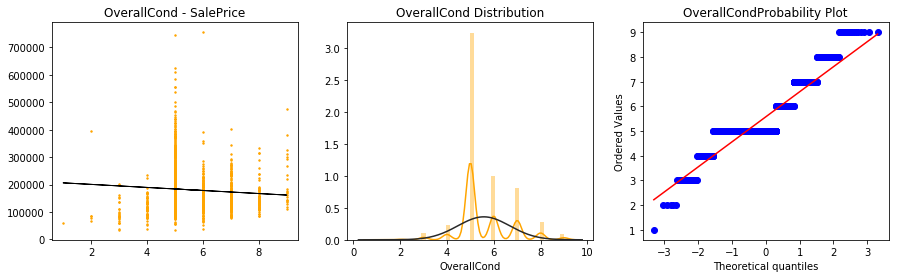

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.9480105638504028, 2.6899265770757965e-22)
D’Agostino’s K^2 Test : NormaltestResult(statistic=11.904563953541974, pvalue=0.002599900830568968)
Anderson-Darling Test : AndersonResult(statistic=35.230011585458215, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


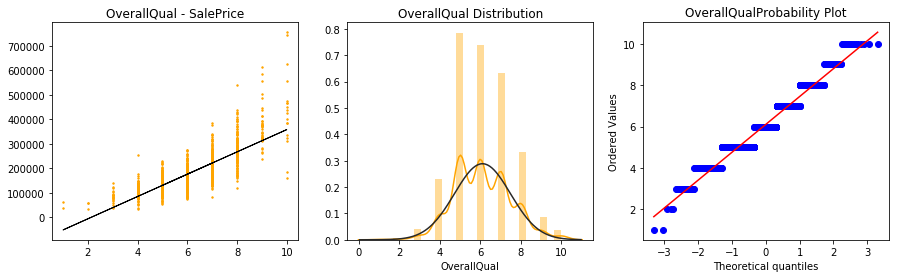

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.3575764298439026, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1170.2656094114086, pvalue=7.58667946680553e-255)
Anderson-Darling Test : AndersonResult(statistic=412.0435395823338, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


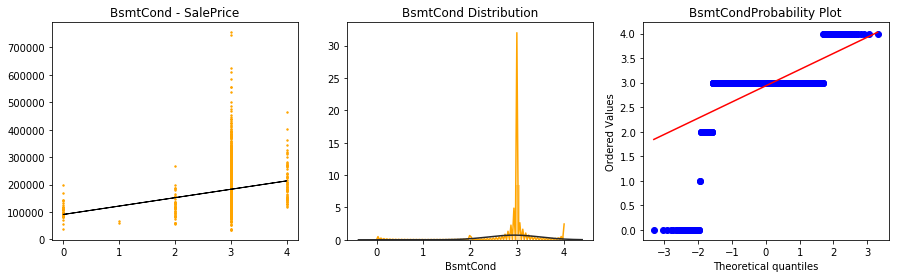

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.705801248550415, 8.407790785948902e-45)
D’Agostino’s K^2 Test : NormaltestResult(statistic=203.172100328193, pvalue=7.61621114241034e-45)
Anderson-Darling Test : AndersonResult(statistic=214.95412766271284, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


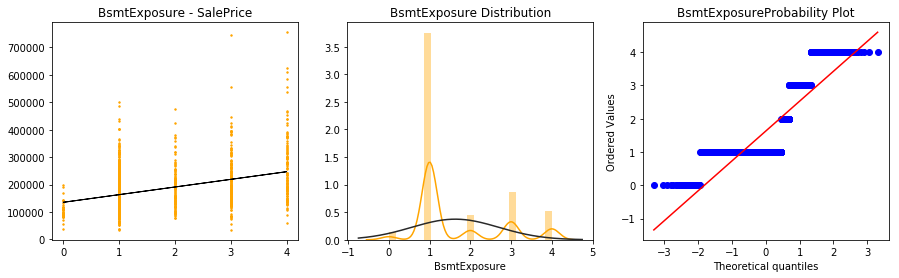

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.8352217674255371, 2.2367622048471567e-36)
D’Agostino’s K^2 Test : NormaltestResult(statistic=6.139464098176268, pvalue=0.046433595114819905)
Anderson-Darling Test : AndersonResult(statistic=92.02079882380303, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


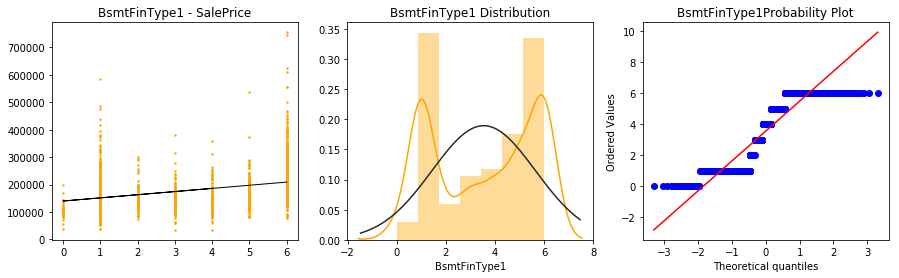

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.42155712842941284, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1018.2529618959079, pvalue=7.747805924168913e-222)
Anderson-Darling Test : AndersonResult(statistic=388.06547314709496, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


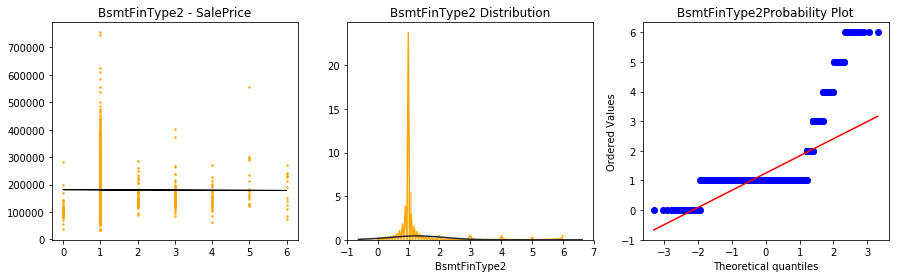

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.8244044780731201, 2.938318402217227e-37)
D’Agostino’s K^2 Test : NormaltestResult(statistic=104.98625589484845, pvalue=1.5941316874862008e-23)
Anderson-Darling Test : AndersonResult(statistic=111.63178567719069, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


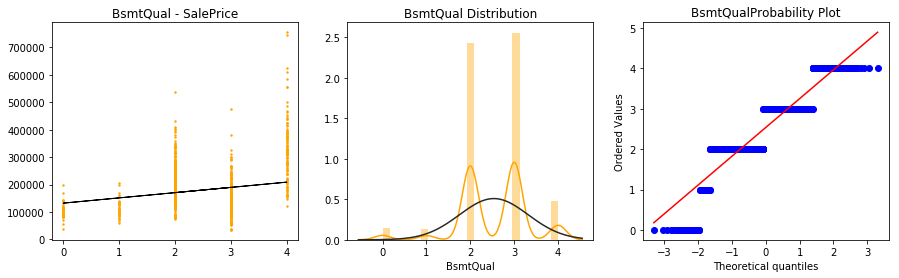

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.29963064193725586, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1429.4764371714173, pvalue=3.918642667066e-311)
Anderson-Darling Test : AndersonResult(statistic=456.5988703140995, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


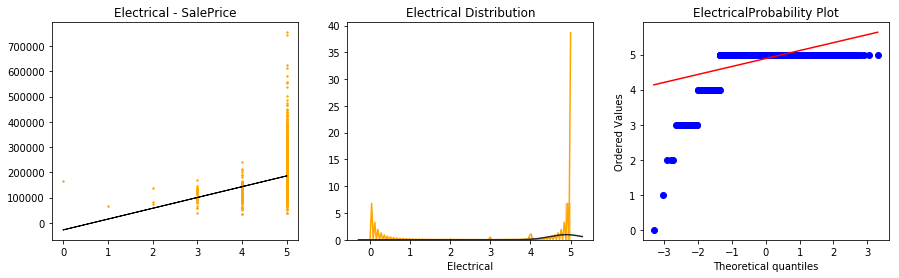

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.44924396276474, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=474.6288422091369, pvalue=8.622961324570248e-104)
Anderson-Darling Test : AndersonResult(statistic=410.77255991377615, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


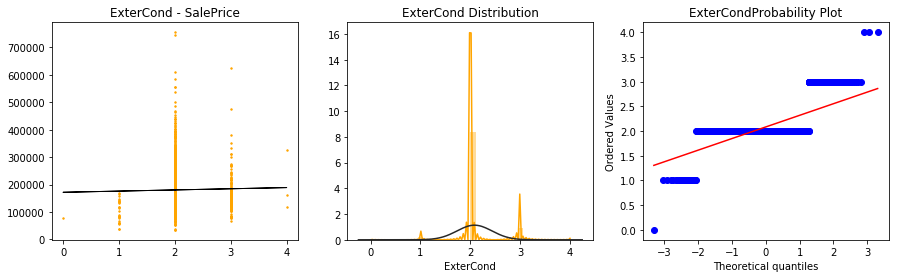

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.7037234306335449, 5.605193857299268e-45)
D’Agostino’s K^2 Test : NormaltestResult(statistic=130.138879821603, pvalue=5.504289988051842e-29)
Anderson-Darling Test : AndersonResult(statistic=216.84523314854687, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


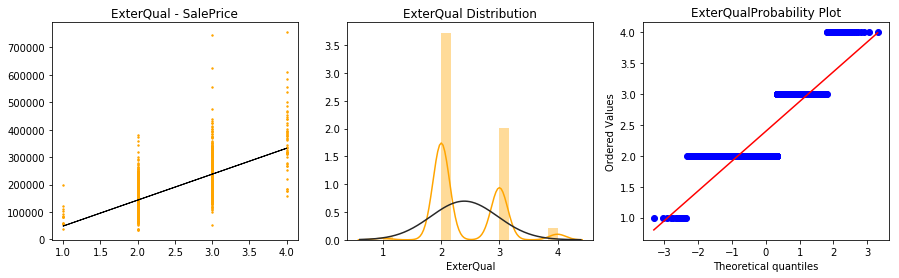

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.5080368518829346, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=442.3166557351986, pvalue=8.956917625806251e-97)
Anderson-Darling Test : AndersonResult(statistic=364.11386225895967, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


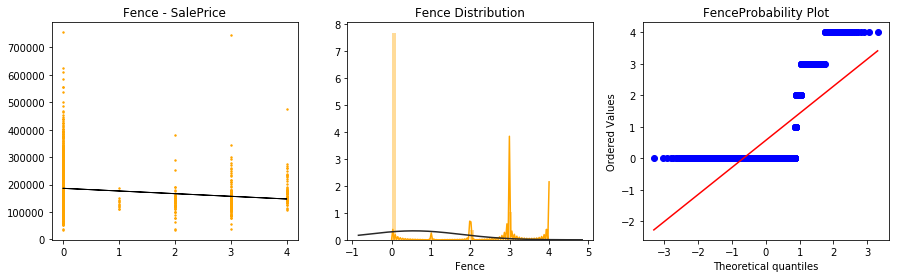

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.7533166408538818, 3.700829244281842e-42)
D’Agostino’s K^2 Test : NormaltestResult(statistic=3.100232480043206, pvalue=0.21222330355154467)
Anderson-Darling Test : AndersonResult(statistic=163.67874262881287, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


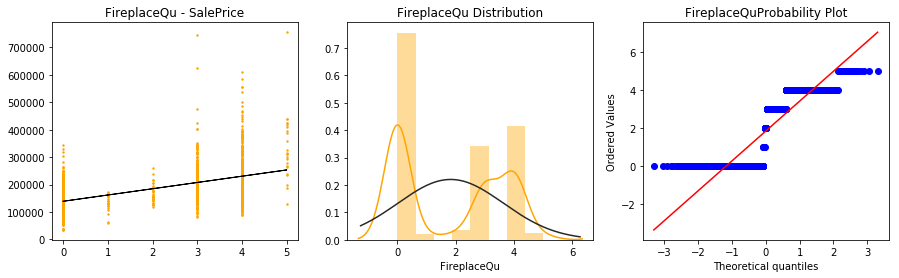

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.25435930490493774, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1439.5675897936708, pvalue=0.0)
Anderson-Darling Test : AndersonResult(statistic=479.49875500439225, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


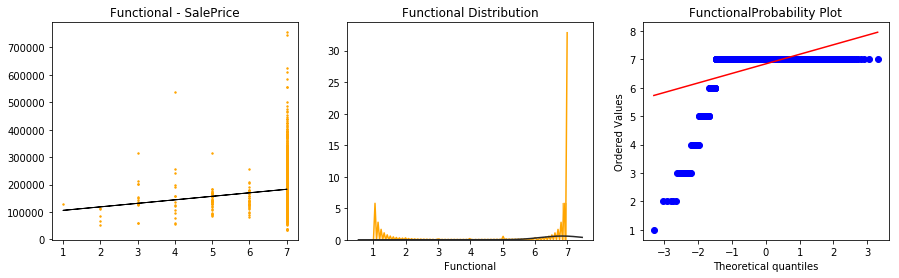

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.3270435929298401, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1008.1764846901494, pvalue=1.1946975064011701e-219)
Anderson-Darling Test : AndersonResult(statistic=463.95682958049156, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


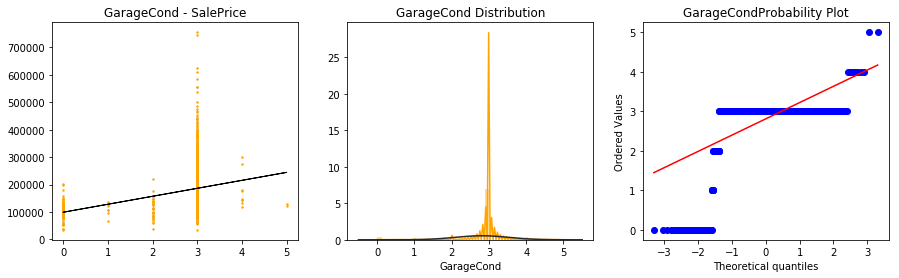

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.8469972610473633, 2.3101721283912303e-35)
D’Agostino’s K^2 Test : NormaltestResult(statistic=386.9350336878669, pvalue=9.508784547548685e-85)
Anderson-Darling Test : AndersonResult(statistic=97.3022975384963, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


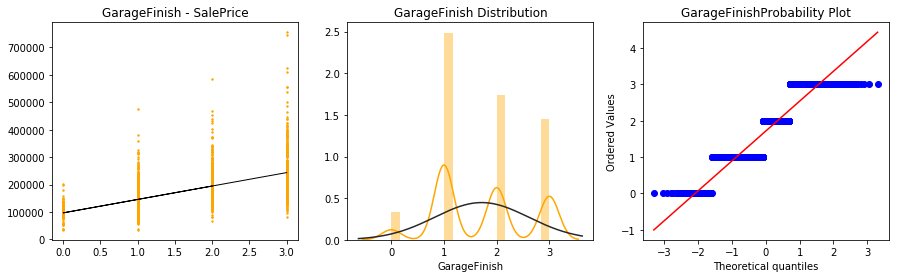

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.34935909509658813, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=983.6499515210938, pvalue=2.5300375390002914e-214)
Anderson-Darling Test : AndersonResult(statistic=446.6667088547881, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


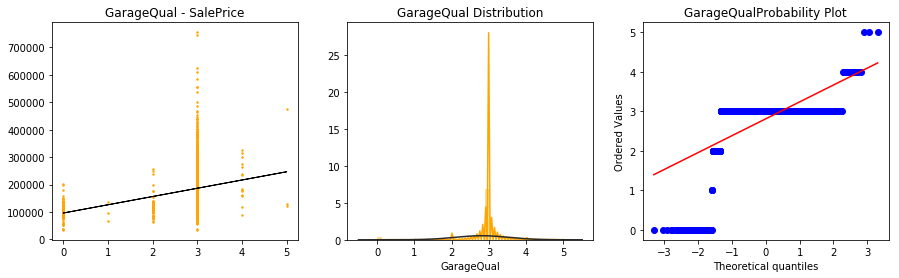

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.7288667559623718, 1.4153114489680652e-43)
D’Agostino’s K^2 Test : NormaltestResult(statistic=19.33478989129513, pvalue=6.331457860298343e-05)
Anderson-Darling Test : AndersonResult(statistic=174.9289279401271, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


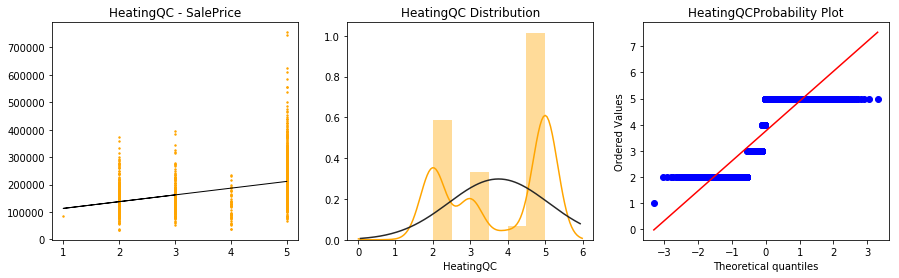

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.7948647141456604, 1.844823441268265e-39)
D’Agostino’s K^2 Test : NormaltestResult(statistic=38.93744188235822, pvalue=3.5062423054671957e-09)
Anderson-Darling Test : AndersonResult(statistic=148.32341900226356, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


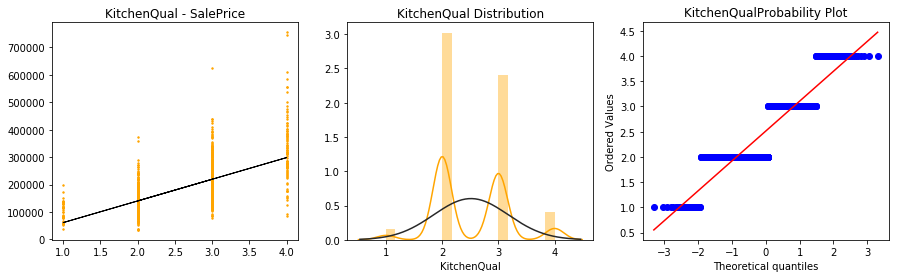

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.3032051920890808, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=987.2687622318201, pvalue=4.142973960144081e-215)
Anderson-Darling Test : AndersonResult(statistic=485.59328473977143, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


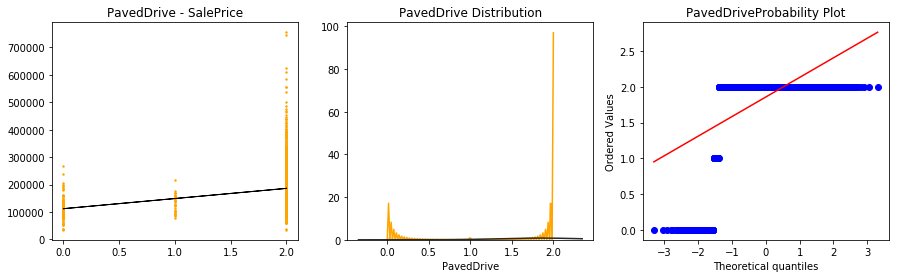

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.03682667016983032, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=3088.316180740563, pvalue=0.0)
Anderson-Darling Test : AndersonResult(statistic=559.3946246215769, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


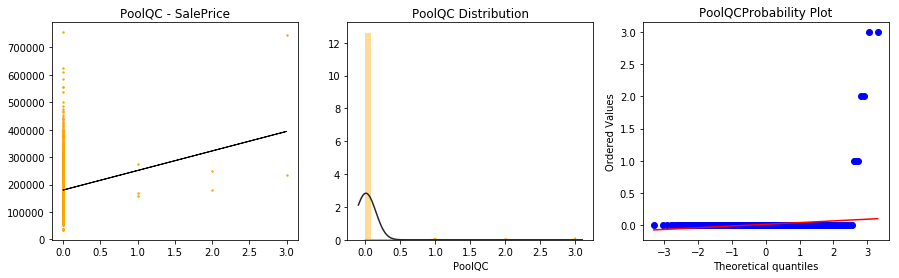

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.008662045001983643, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=4251.908286256341, pvalue=0.0)
Anderson-Darling Test : AndersonResult(statistic=563.7003541595145, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


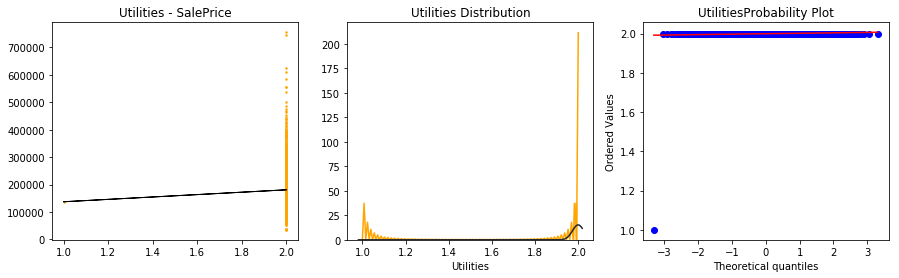

In [20]:
ols = linear_model.LinearRegression()

for i in list(date_set.keys()):
    X = train_data[i].values.reshape(-1,1)
    Y = train_data['SalePrice']
    ols.fit(X, Y)
    
    print('- Normality(H0 : normal distribution)')
    print('Shapiro-Wilk Test : ' + str(shapiro(train_data[i])))
    print('D’Agostino’s K^2 Test : ' + str(normaltest(train_data[i])))
    print('Anderson-Darling Test : ' + str(anderson(train_data[i])))
    
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    
    ax1.scatter(train_data[i], train_data['SalePrice'], s = 2, c = 'orange')
    ax1.plot(X, X * ols.coef_ + ols.intercept_, color = 'black', linewidth = 1)
    
    sns.distplot(train_data[i], fit = norm, color = 'orange', ax = ax2)
    
    stats.probplot(train_data[i], dist="norm", plot=ax3)
    
    ax1.set_title(str(i) + ' - SalePrice')
    ax2.set_title(str(i) + ' Distribution')
    ax3.set_title(str(i) + 'Probability Plot')
    
    plt.show()

# All plots(after transformation)

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.9687871336936951, 3.1857663534952884e-17)
D’Agostino’s K^2 Test : NormaltestResult(statistic=26.31347922811681, pvalue=1.932415826822277e-06)
Anderson-Darling Test : AndersonResult(statistic=14.53186137577677, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


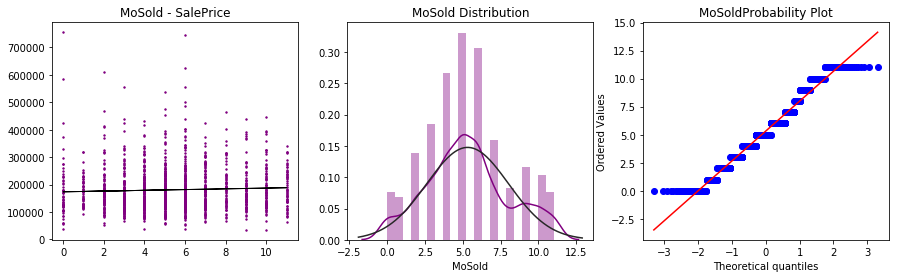

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.9255985021591187, 2.7712865408200895e-26)
D’Agostino’s K^2 Test : NormaltestResult(statistic=98.33202788201214, pvalue=4.44090464632742e-22)
Anderson-Darling Test : AndersonResult(statistic=30.96352276742573, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


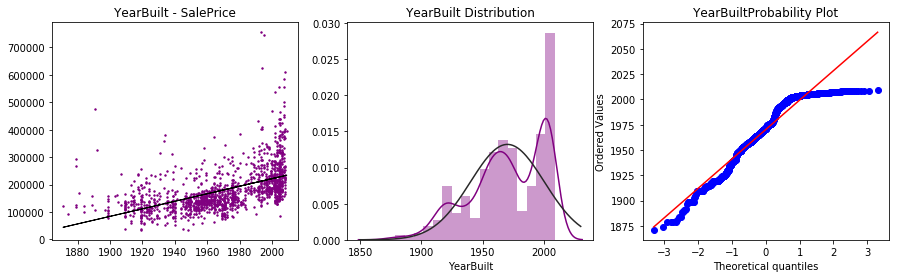

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.8628062605857849, 6.728886904186828e-34)
D’Agostino’s K^2 Test : NormaltestResult(statistic=2431.493629835766, pvalue=0.0)
Anderson-Darling Test : AndersonResult(statistic=71.49440205330166, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


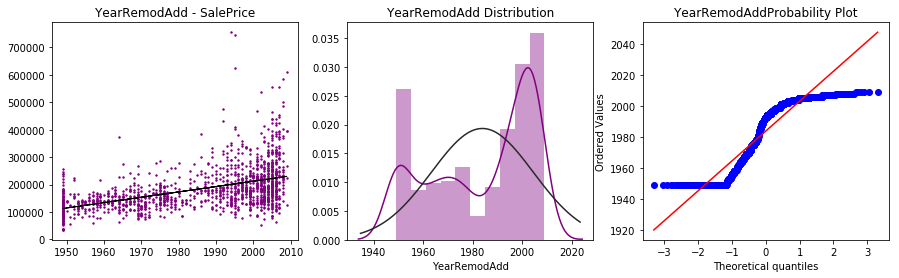

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.8970962762832642, 3.4190127761463244e-30)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1051.8359543865085, pvalue=3.951159587877761e-229)
Anderson-Darling Test : AndersonResult(statistic=50.83825780090865, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


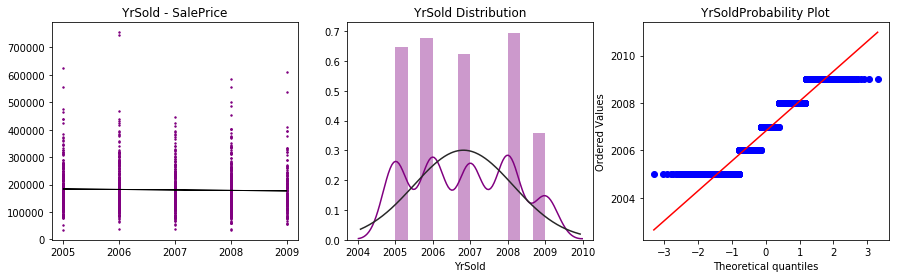

- Normality(H0 : normal distribution)
Shapiro-Wilk Test : (0.2826545238494873, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1149.469064473582, pvalue=2.4886515353608715e-250)
Anderson-Darling Test : AndersonResult(statistic=461.13088144440485, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


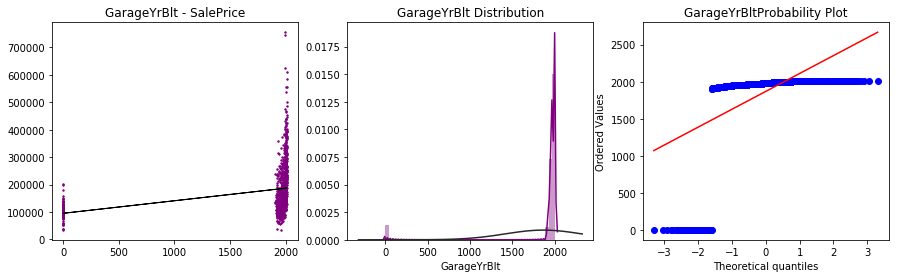

In [21]:
#transformation fails : YrSold, GarageYrBlt

for i in list(date_set.keys()):
    try:
        train_data[i] = boxcox(train_data[i], date_set[i])
    except:
        train_data[i] = boxcox1p(train_data[i], date_set[i])
    
    X = train_data[i].values.reshape(-1,1)
    Y = train_data['SalePrice']
    ols.fit(X, Y)
    
    print('- Normality(H0 : normal distribution)')
    print('Shapiro-Wilk Test : ' + str(shapiro(train_data[i])))
    print('D’Agostino’s K^2 Test : ' + str(normaltest(train_data[i])))
    print('Anderson-Darling Test : ' + str(anderson(train_data[i])))
    
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    
    ax1.scatter(train_data[i], train_data['SalePrice'], s = 2, c = 'purple')
    ax1.plot(X, X * ols.coef_ + ols.intercept_, color = 'black', linewidth = 1)
    
    sns.distplot(train_data[i], fit = norm, color = 'purple', ax = ax2)
    
    stats.probplot(train_data[i], dist="norm", plot=ax3)
    
    ax1.set_title(str(i) + ' - SalePrice')
    ax2.set_title(str(i) + ' Distribution')
    ax3.set_title(str(i) + 'Probability Plot')
    
    plt.show()

# Finding the best transformation coefficient by each variable

No_transform : 1.0
- Normality Test
Shapiro-Wilk Test : (0.2826545238494873, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1149.469064473582, pvalue=2.4886515353608715e-250)
Anderson-Darling Test : AndersonResult(statistic=461.13088144440485, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


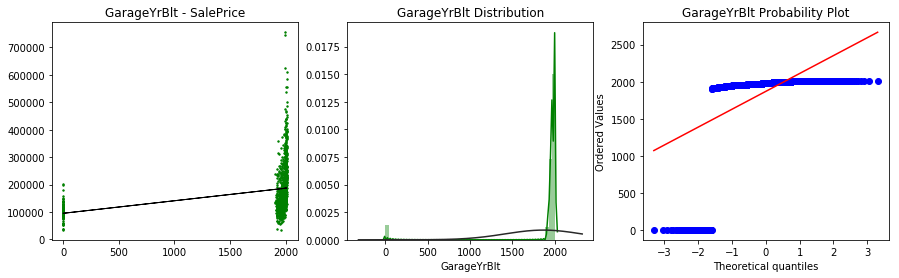

Square_root_transform : 0.5
- Normality Test
Shapiro-Wilk Test : (0.2612517476081848, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1152.7820369624205, pvalue=4.748552621242395e-251)
Anderson-Darling Test : AndersonResult(statistic=490.45229900555114, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


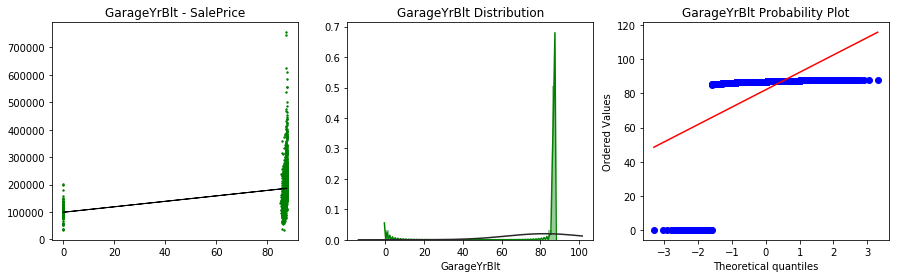

Log_transform : 0.0
- Normality Test
Shapiro-Wilk Test : (0.24491876363754272, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1153.8873884541263, pvalue=2.7323556550565926e-251)
Anderson-Darling Test : AndersonResult(statistic=514.1027780611707, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


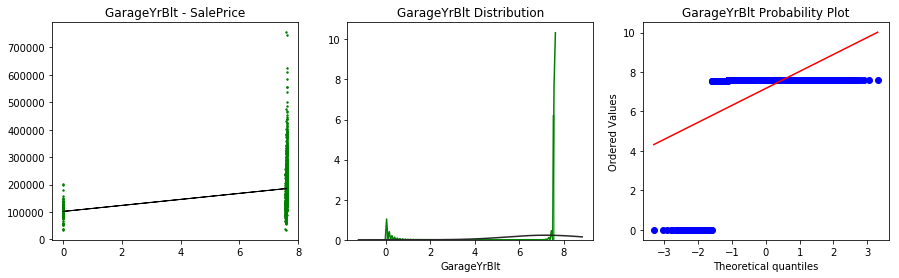

Reciprocal_square_root_transform : -0.5
- Normality Test
Shapiro-Wilk Test : (0.23980921506881714, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1153.9658455003685, pvalue=2.6272445341636946e-251)
Anderson-Darling Test : AndersonResult(statistic=521.7521745004265, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


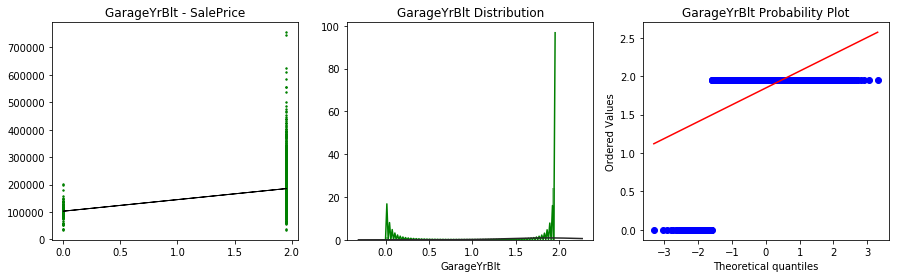

Reciprocal_transform : -1
- Normality Test
Shapiro-Wilk Test : (0.23935502767562866, 0.0)
D’Agostino’s K^2 Test : NormaltestResult(statistic=1153.9664493085381, pvalue=2.6264514780262913e-251)
Anderson-Darling Test : AndersonResult(statistic=522.4558864894377, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


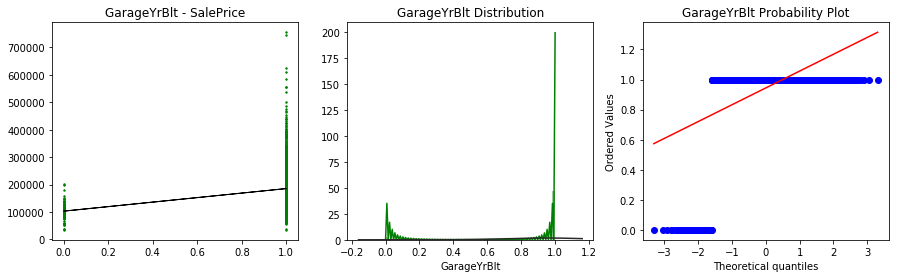

In [22]:
lambdas = {1.0 : 'No_transform', 0.5 : 'Square_root_transform', 0.0 : 'Log_transform', -0.5 : 'Reciprocal_square_root_transform', -1 : 'Reciprocal_transform'}

input_data = 'GarageYrBlt'


for i in lambdas.keys():
    transform_data = train_data[input_data].copy()
    try:
        transform_data = boxcox(transform_data, i)
    except:
        transform_data = boxcox1p(transform_data, i)
    try:
        X = transform_data.values.reshape(-1,1)
    except:
        X = transform_data.reshape(-1,1)
    Y = train_data['SalePrice']
    ols.fit(X, Y)
    
    print(str(lambdas[i]) + ' : '+ str(i))
    print('- Normality Test')
    print('Shapiro-Wilk Test : ' + str(shapiro(transform_data)))
    print('D’Agostino’s K^2 Test : ' + str(normaltest(transform_data)))
    print('Anderson-Darling Test : ' + str(anderson(transform_data)))
    
    fig = plt.figure(figsize=(15,4))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    
    ax1.scatter(transform_data, train_data['SalePrice'], s = 2, c = 'green')
    ax1.plot(X, X * ols.coef_ + ols.intercept_, color = 'black', linewidth = 1)
    
    sns.distplot(transform_data, fit = norm, color = 'green', ax = ax2)
    
    stats.probplot(transform_data, dist="norm", plot=ax3)
    
    ax1.set_title(str(input_data) + ' - SalePrice')
    ax2.set_title(str(input_data) + ' Distribution')
    ax3.set_title(str(input_data) + ' Probability Plot')
    
    plt.show()